In [13]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('text', usetex=False)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 
mpl.rcParams['legend.fontsize'] = 16

In [17]:
res = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)
res.sort_values(['chromosome', 'startposition'], inplace=True)
OR = (res['padj-58'] < 0.05) | (res['padj-50'] < 0.05)
AND = (res['padj-58'] < 0.05) & (res['padj-50'] < 0.05)
res = res[OR]
res.columns

Index(['baseMean-50', 'log2FoldChange-50', 'lfcSE-50', 'stat-50', 'pvalue-50',
       'padj-50', 'genename-50', 'neglogq-50', 'baseMean-58',
       'log2FoldChange-58', 'lfcSE-58', 'stat-58', 'pvalue-58', 'padj-58',
       'genename-58', 'neglogq-58', 'baseMean-pqm1', 'log2FoldChange-pqm1',
       'lfcSE-pqm1', 'stat-pqm1', 'pvalue-pqm1', 'padj-pqm1', 'genename-pqm1',
       'logq-pqm1', 'externalgenename', 'description', 'chromosome',
       'startposition', 'endposition', 'strand', 'Rank', 'Transcript', 'Gene',
       'Locus', 'AvailableExperiments', 'ExpUp', 'ExpDown', 'VoteScore',
       'tvalue', 'pvalue', 'fdr', 'DBE', 'DAE', 'daf16', 'pqm1', 'Size',
       'Sign-50', 'Sign-58', 'Sign-pqm1', 'Sign-WT', 'Significance-WT',
       'Significance-pqm1', 'Ratio', 'Above', 'MinCountsDetected', 'logBM-50',
       'logBM-58'],
      dtype='object')

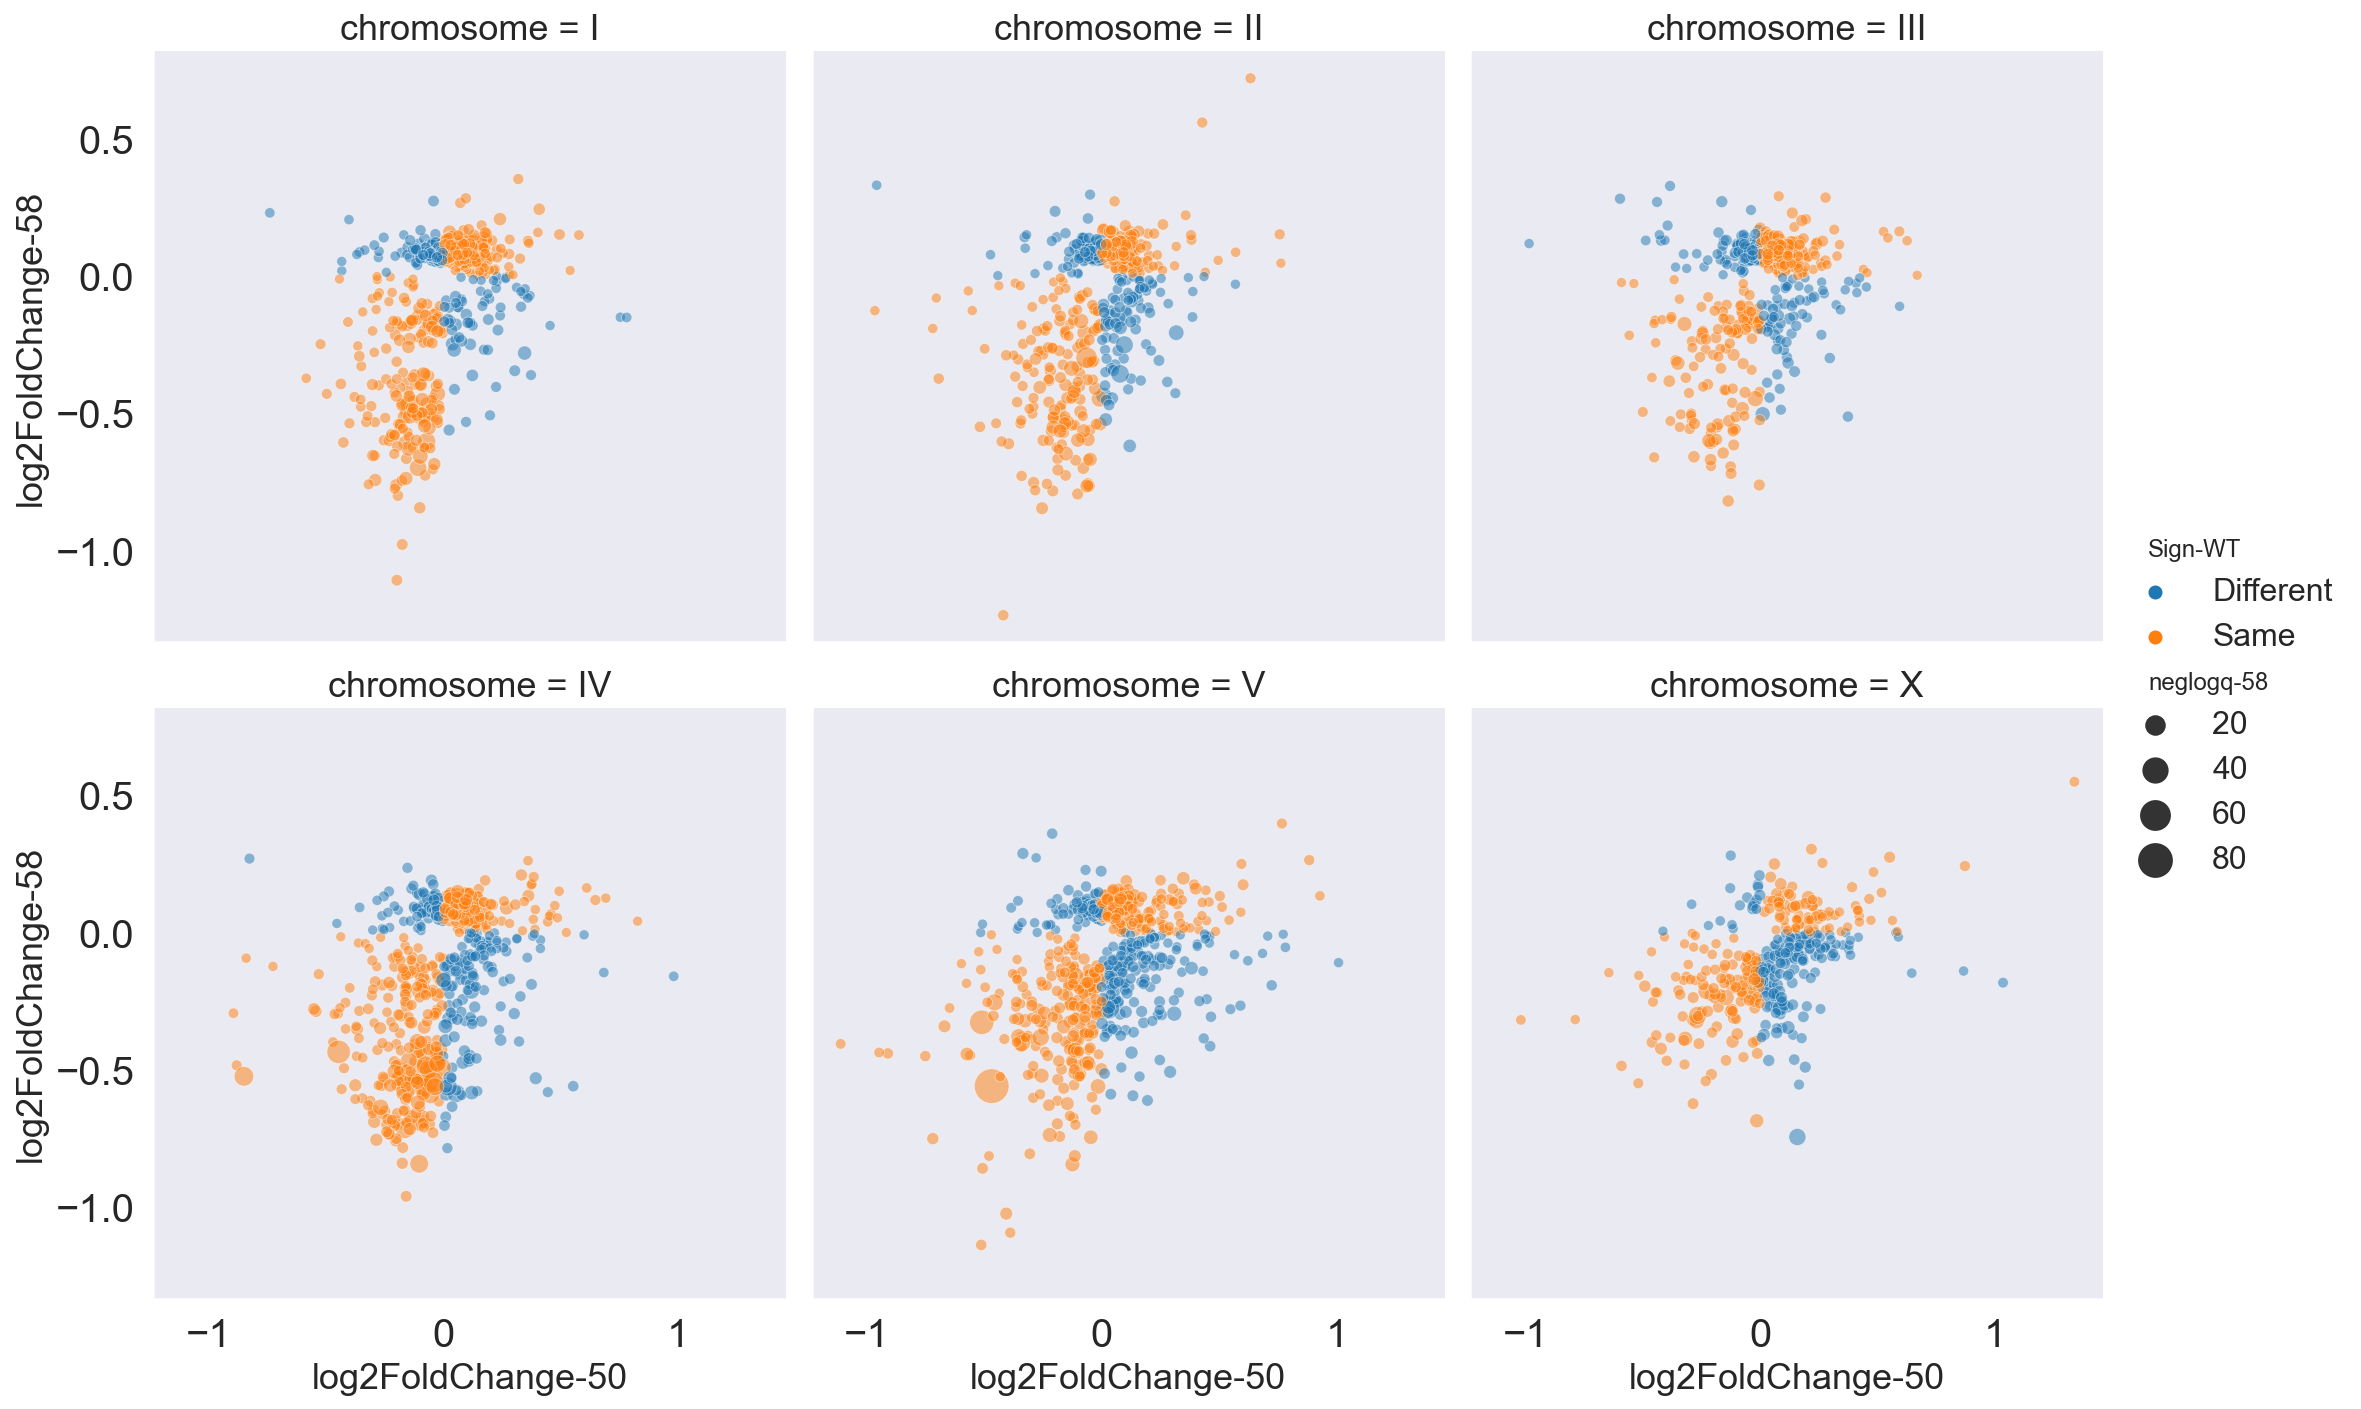

In [18]:
sns.relplot(
    data=res,
    x="log2FoldChange-50", y="log2FoldChange-58",
    col="chromosome", size='neglogq-58', col_wrap=3,
    kind="scatter", sizes=(25, 300), hue='Sign-WT',
    alpha=0.5
)

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


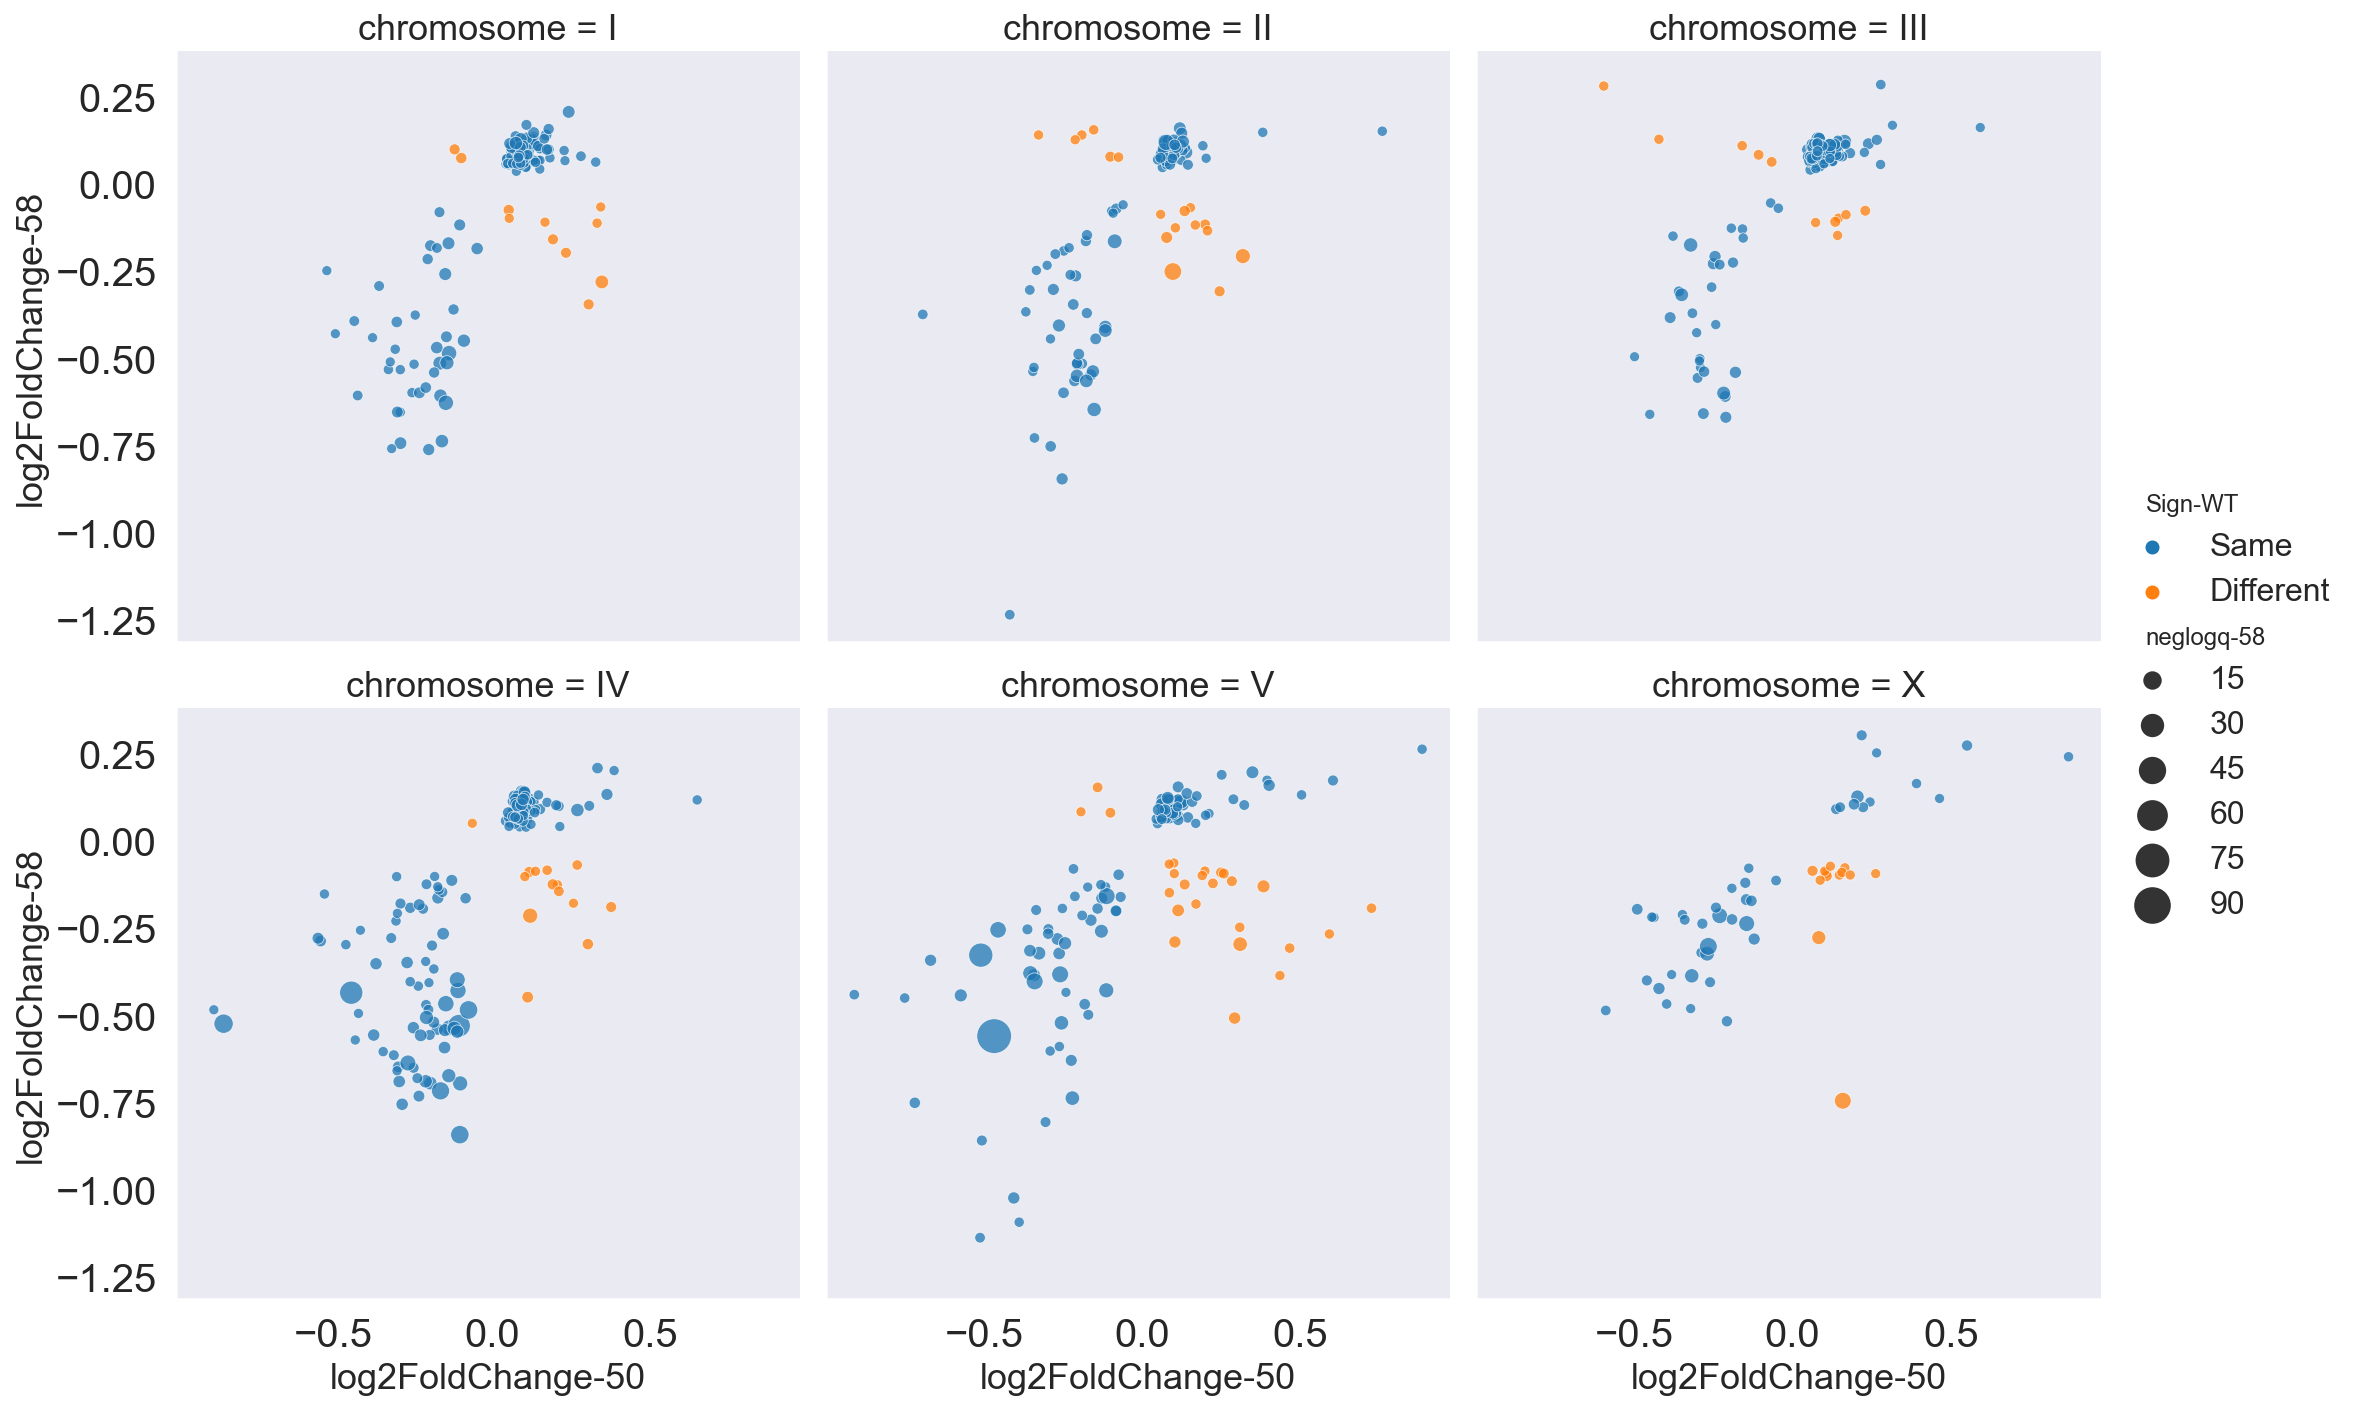

In [19]:
sns.relplot(
    data=res[AND],
    x="log2FoldChange-50", y="log2FoldChange-58",
    col="chromosome", size='neglogq-58', col_wrap=3,
    kind="scatter", sizes=(25, 300), hue='Sign-WT',
    alpha=0.75
)

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_d

(-1.0, 1.0)

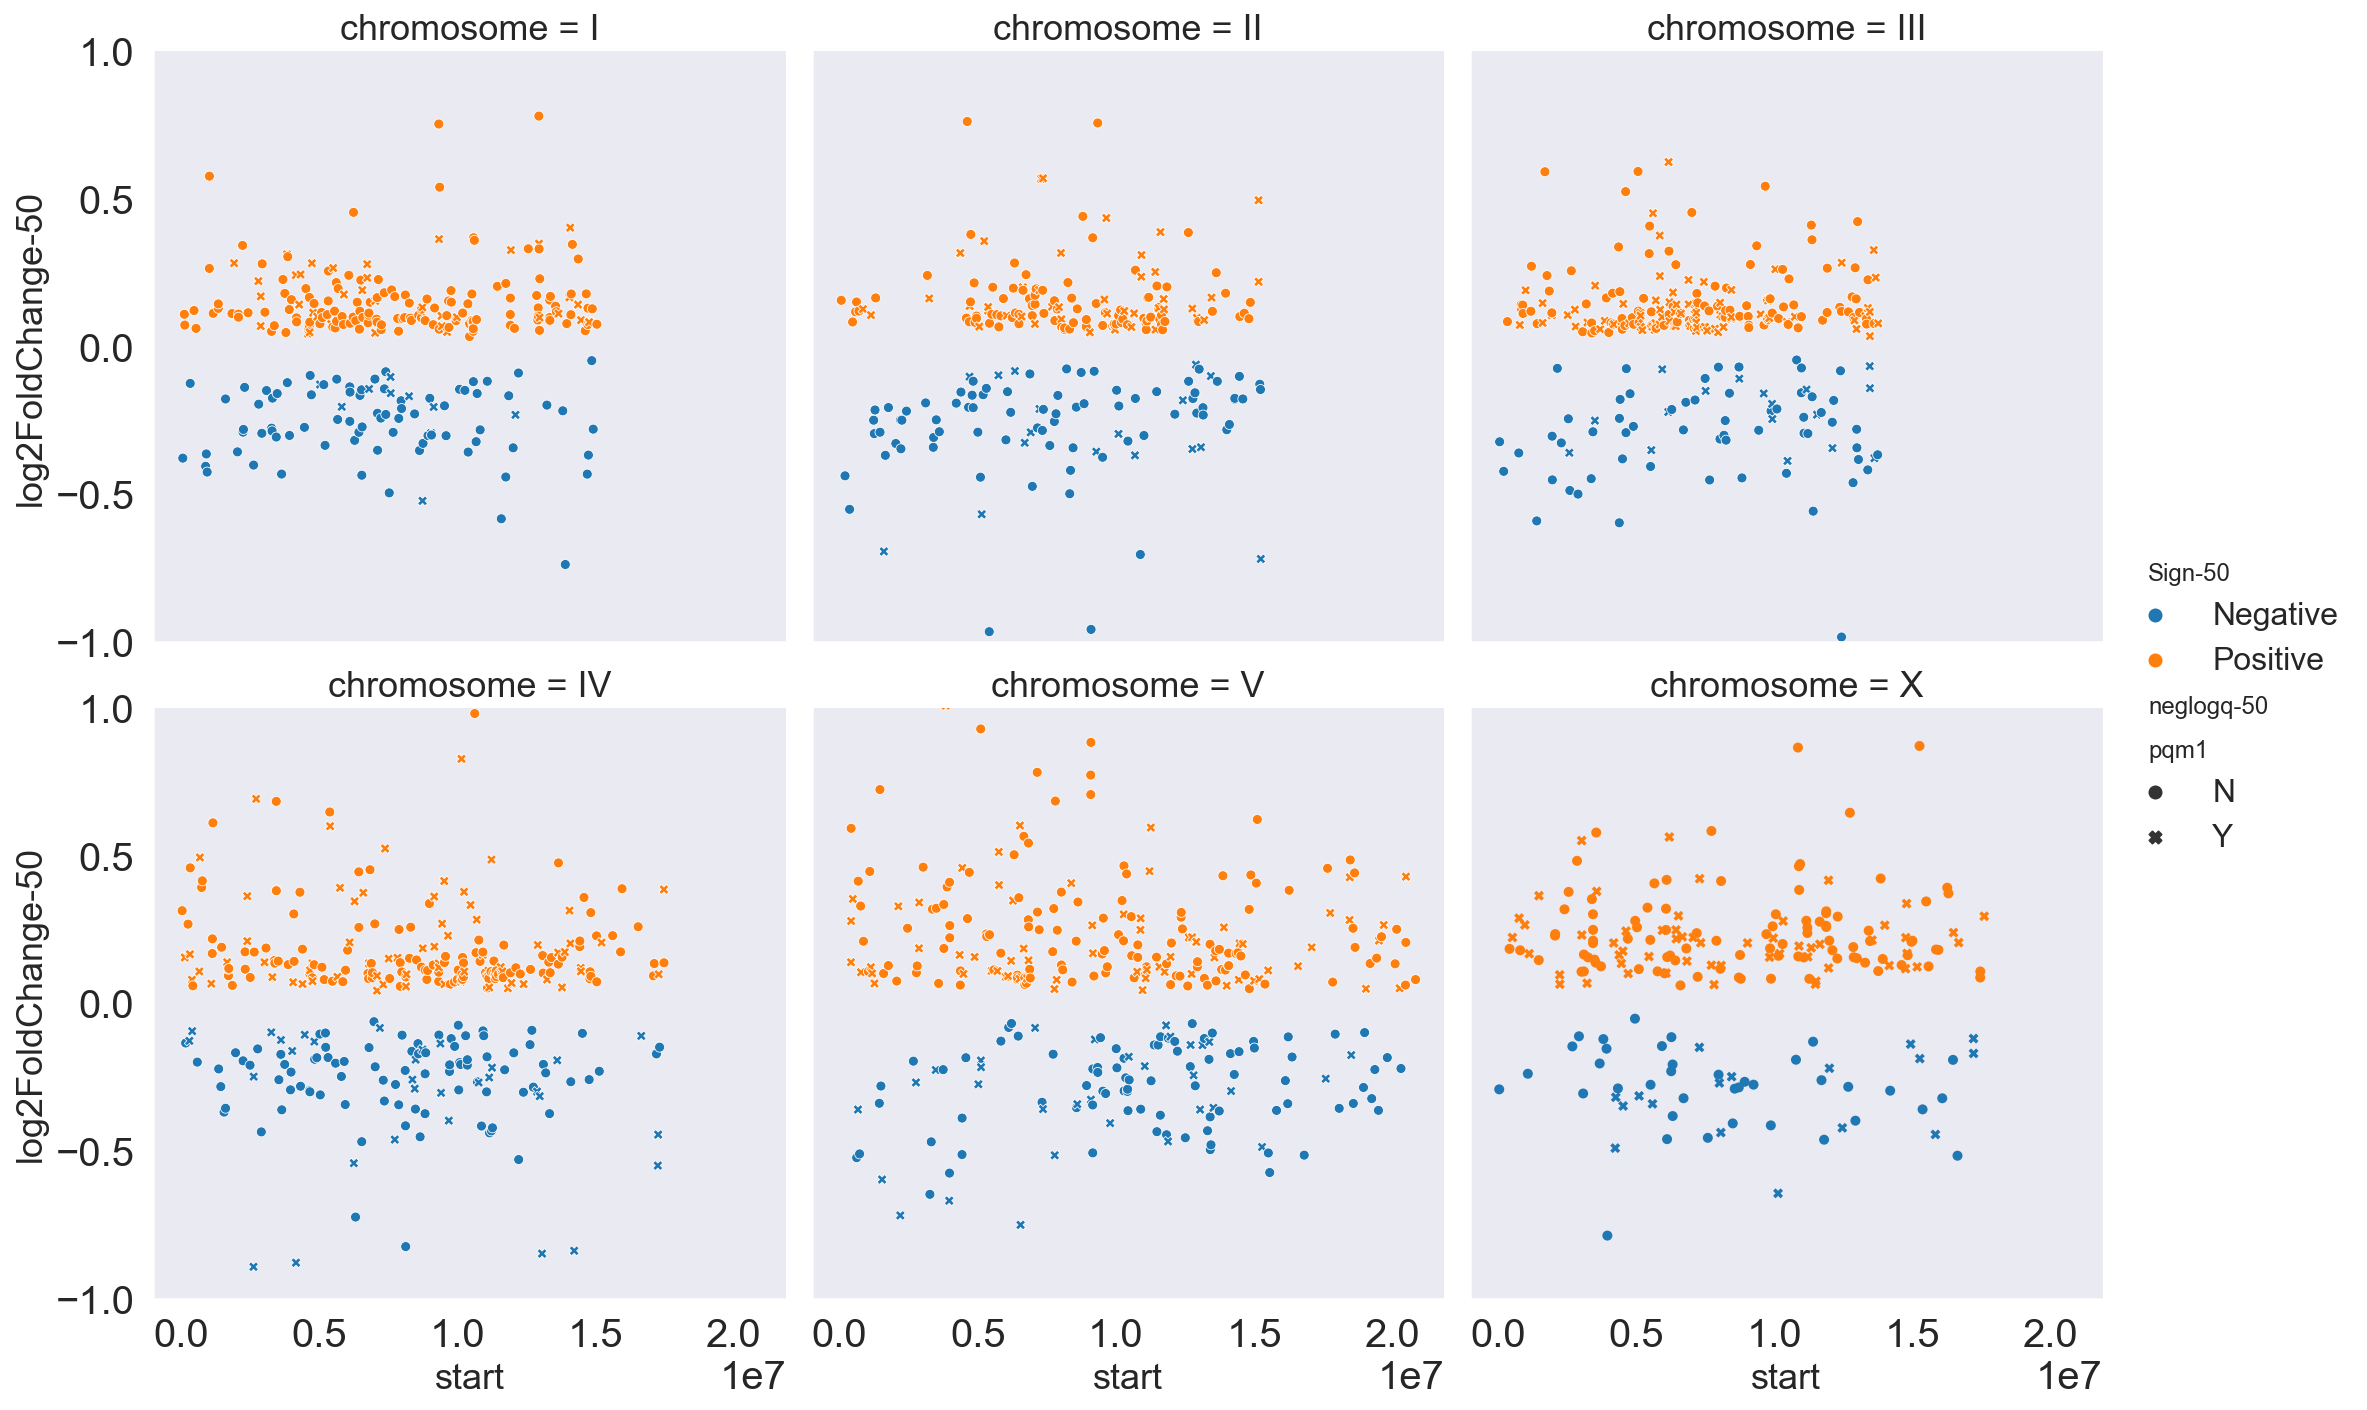

In [21]:
def relplot(x='50', both = False):
    if both is False:
        tmp = res[(res['padj-' + x] < 0.05)].copy()
    else:
        tmp = res[AND].copy()
    sns.relplot(
        data=tmp.rename(columns={'startposition': 'start'}),
        x="start", y="log2FoldChange-" + x,
        col="chromosome", size='neglogq-' + x, style='pqm1',
        kind="scatter", sizes=(25, 300), hue='Sign-' + x,
        col_wrap=3
    )

relplot('50')
plt.ylim(-1, 1)

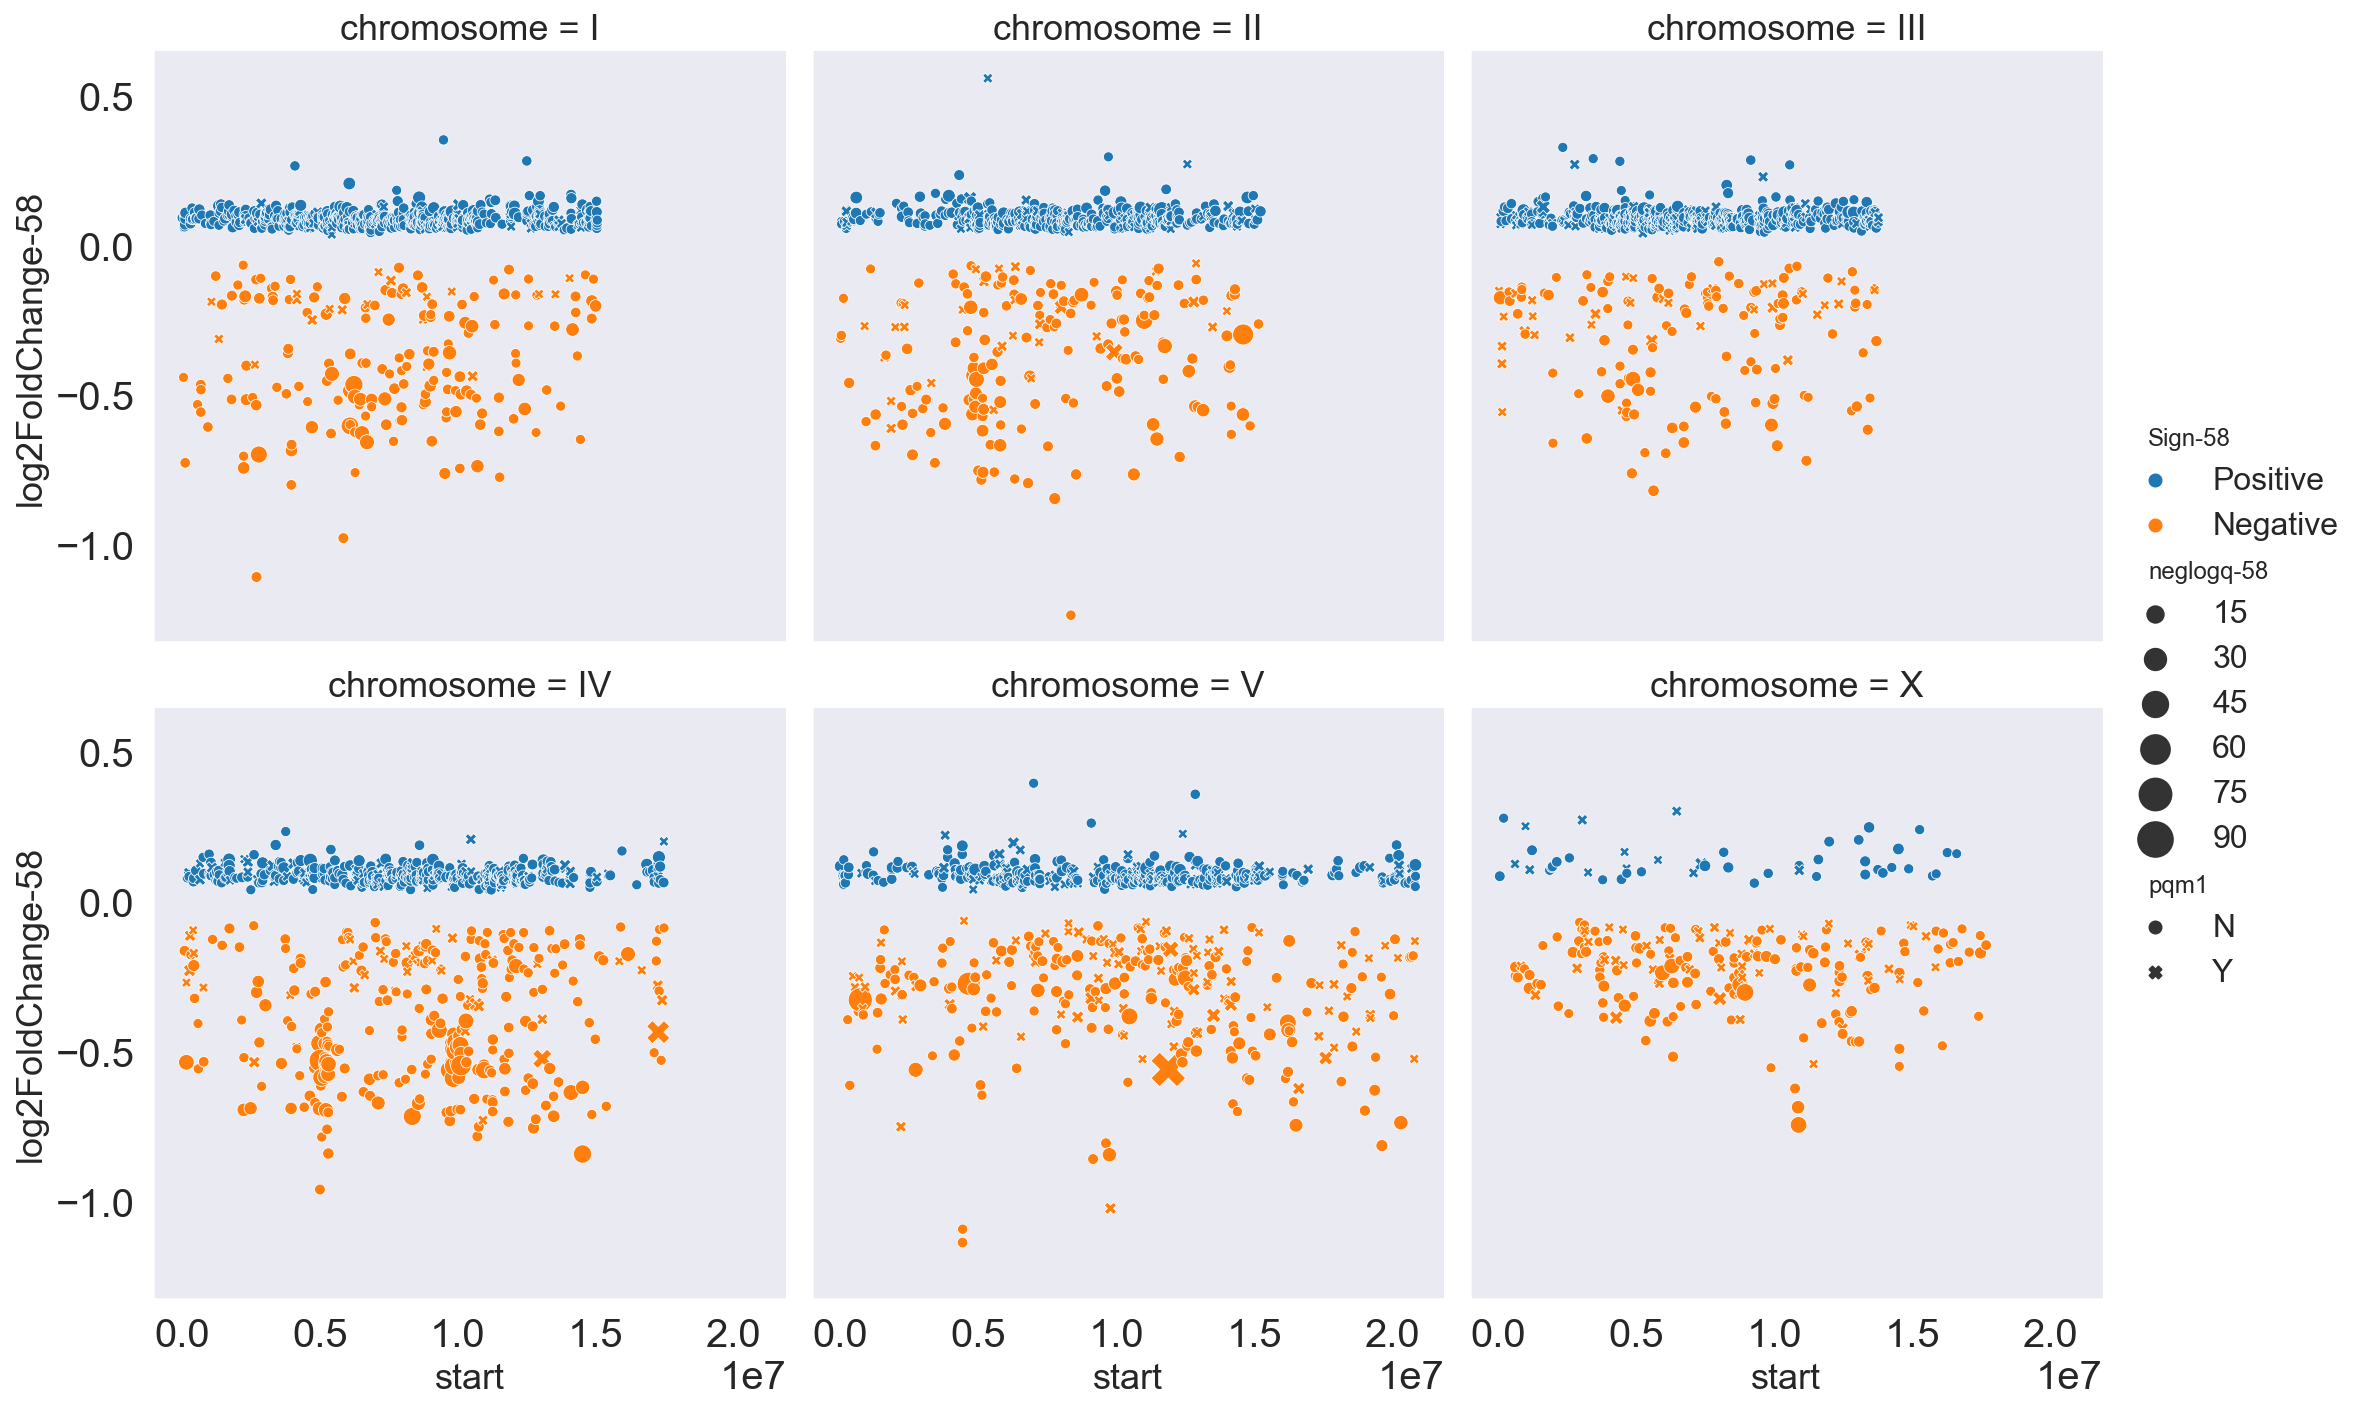

In [22]:
relplot('58')

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


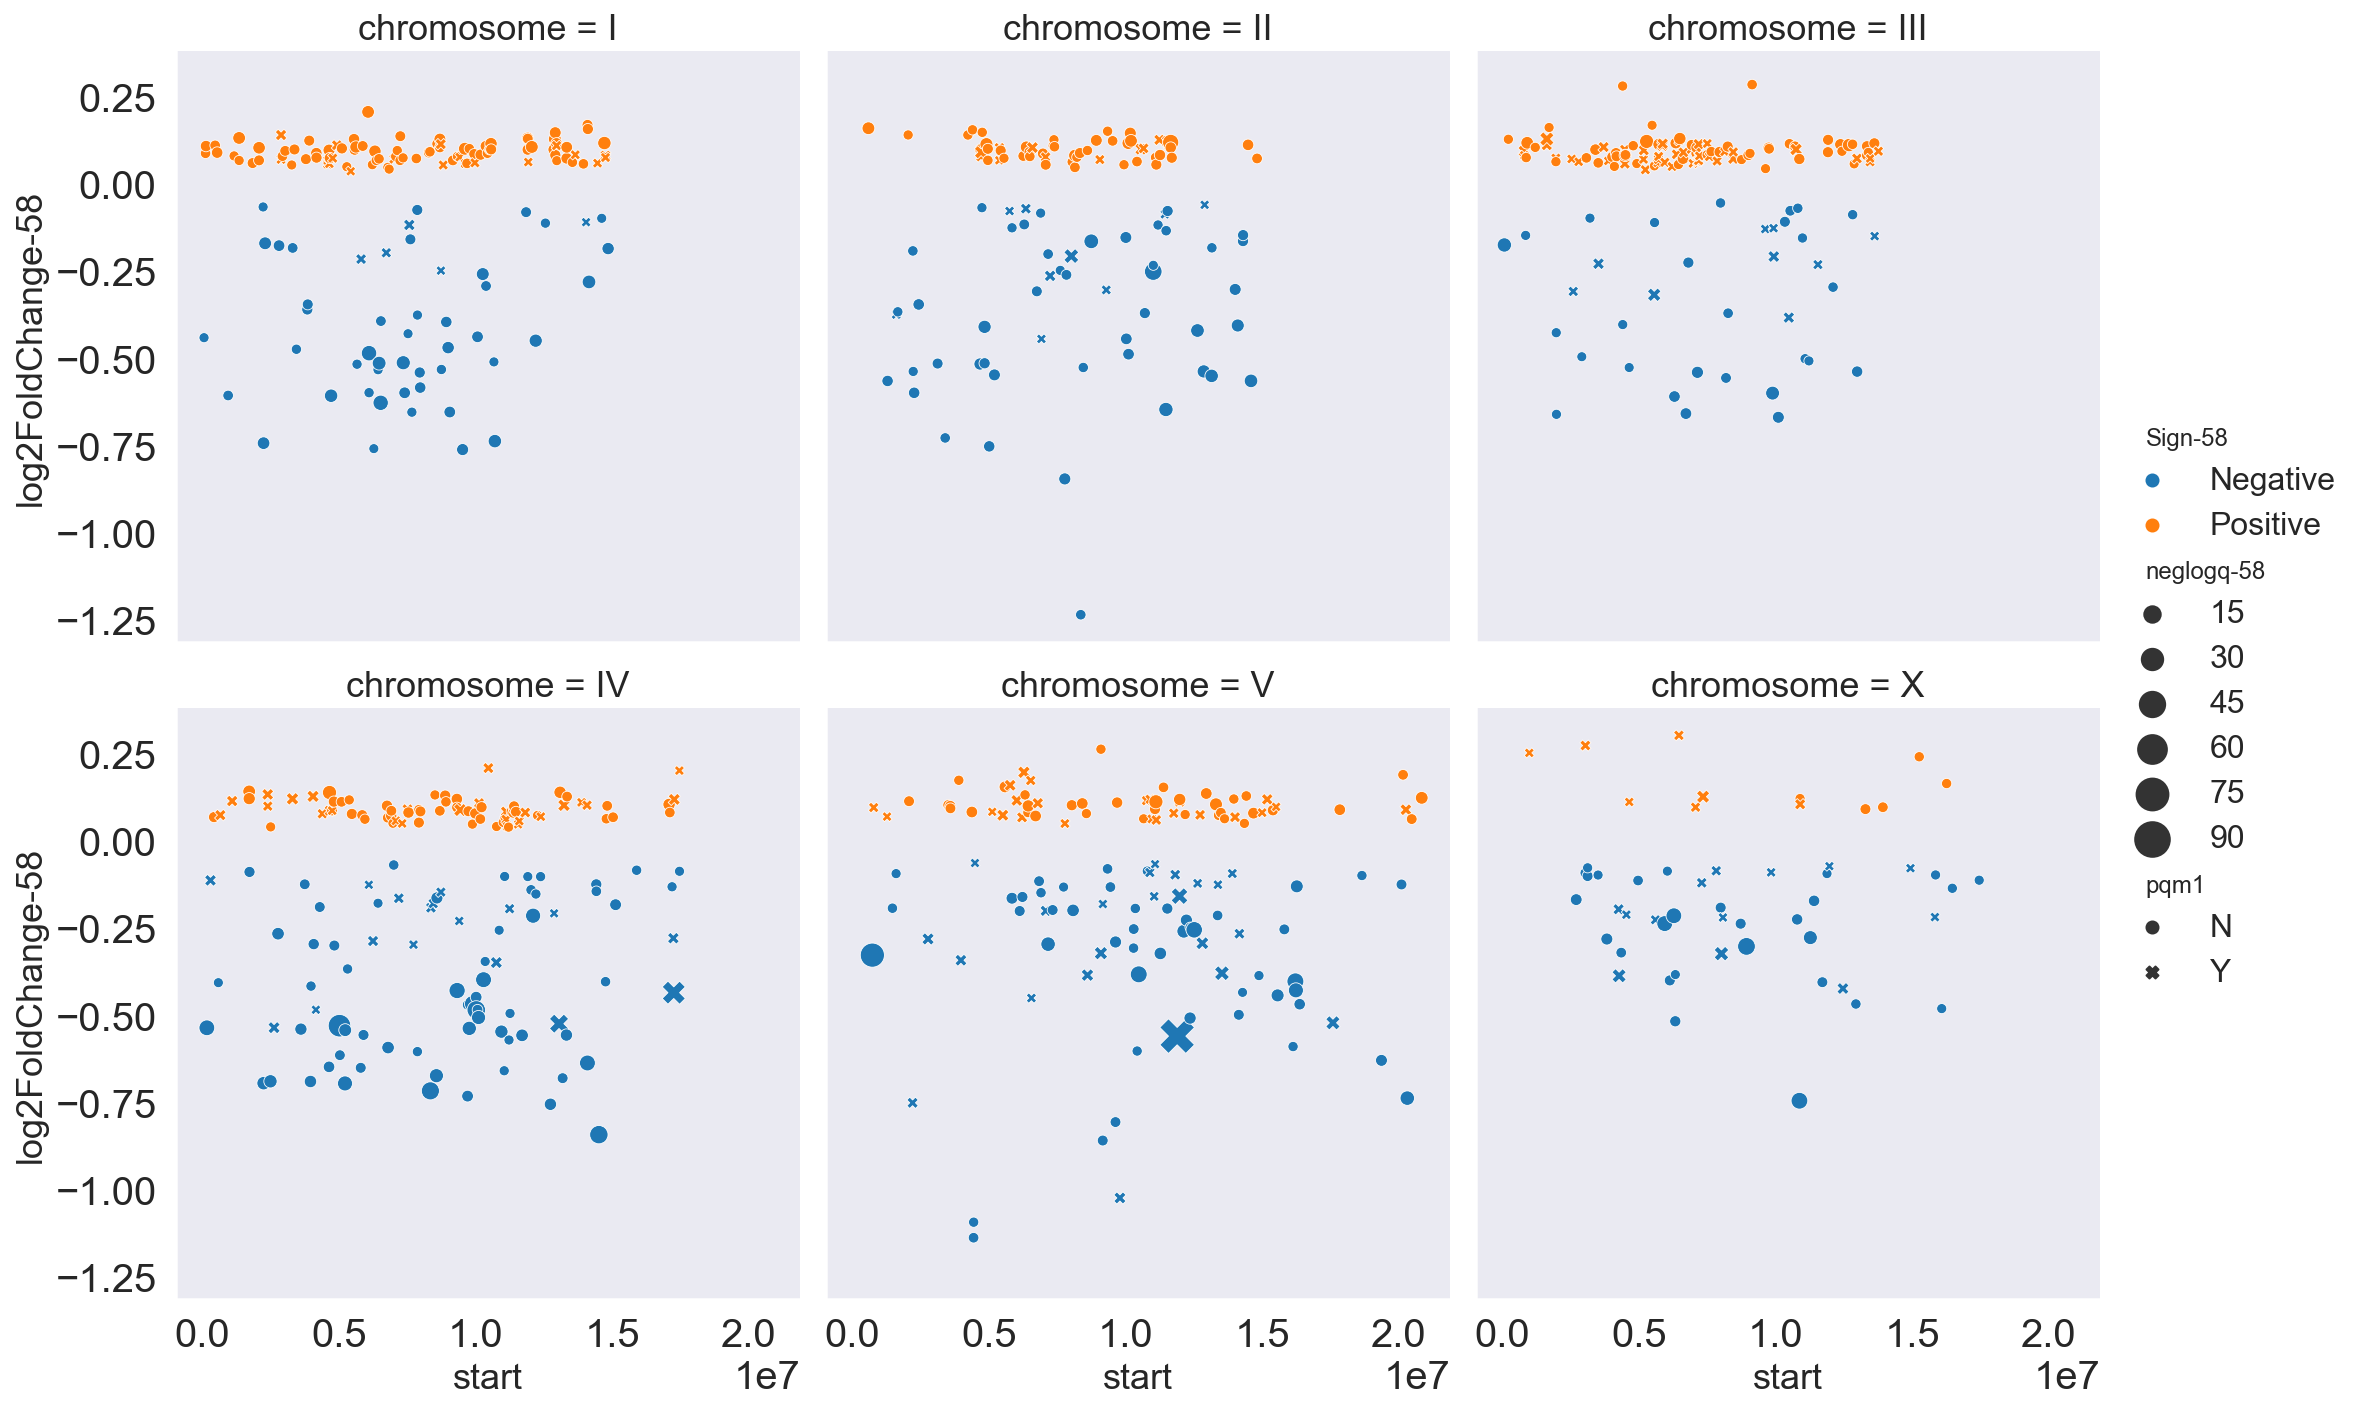

In [24]:
relplot('58', both=True)